데이터과학 과목 학습 참조: http://bigdata.dongguk.ac.kr/lectures/datascience/_book/ 
본격적인 파이썬 프로그래밍 전 주피터 노트북과 웹 화면에 결과를 출력해 본다.
웹 대시보드는 pip3 install dash 모듈을 설치하면,  dash, dash-core-components,dash-html-components, dash-table, plotly, tenacity가 한꺼번에 자동으로 설치된다.

In [3]:
print("헬로우 Python!")

헬로우 Python!


In [4]:
import platform, sys
print("--파이썬 버전확인--"+platform.python_version())
print("--자세한 파이썬 버전 확인--"+sys.version)
print("--콘솔명령으로 파이썬 버전 확인--")
!python --version
print("--콘솔명령으로 주피터 노트북 버전 확인--")
!jupyter --version

--파이썬 버전확인--3.7.4
--자세한 파이썬 버전 확인--3.7.4 (default, Nov  4 2020, 10:17:35) 
[GCC 7.4.0]
--콘솔명령으로 파이썬 버전 확인--
Python 3.7.4
--콘솔명령으로 주피터 노트북 버전 확인--
jupyter core     : 4.6.3
jupyter-notebook : 6.1.4
qtconsole        : 4.7.7
ipython          : 7.19.0
ipykernel        : 5.3.4
jupyter client   : 6.1.7
jupyter lab      : not installed
nbconvert        : 6.0.7
ipywidgets       : 7.5.1
nbformat         : 5.0.8
traitlets        : 5.0.5


In [5]:
import pandas as pd

df = pd.read_csv("data/movie.csv", names = ['영화명', '개봉일', '일별수입', '총 수입', '일별관객수', '총 관객수'], encoding="utf_8")
df

,영화명,개봉일,일별수입,총 수입,일별관객수,총 관객수
0,movieNm,openDt,salesAmt,salesAcc,audiCnt,audiAcc
1,아바타: 물의 길,2022-12-14,5546745851,95843613053,429533,7742684
2,영웅,2022-12-21,4546745851,85843613053,329533,6742684
3,오늘 밤 세계에서 이 사랑이 사라진다 해도,2022-11-30,3546745851,75843613053,229533,5742684
4,젠틀맨,2022-12-28,1546745851,65843613053,129533,4742684
5,올빼미,2022-11-23,1546745851,55843613053,29533,3742684


In [63]:
import pandas as pd

json_Data = pd.read_json('data/movie.json', encoding="utf_8")
#print(json_data['boxOfficeResult']['dailyBoxOfficeList'])
df = pd.DataFrame(json_Data['boxOfficeResult']['dailyBoxOfficeList'])
display(df)

import requests, json
response = requests.get("https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20230101")
display(response.status_code)
display(response.headers['content-type'])
display(response.encoding)
#display(response.text)
#json_Data = json.loads(response.text, encoding="utf_8")
json_Data = response.json() #응답받은 json모양의 text를 json 객체로 변경
df = pd.DataFrame(json_Data['boxOfficeResult']['dailyBoxOfficeList'])
df = df[pd.to_numeric(df['audiAcc'])>=3000000] #총 관객수가 300만이상 데이터 조회조건 추가
#df[['movieNm','openDt','salesAmt','salesAcc','audiCnt','audiAcc']]
df.rename(columns={'movieNm':'영화명','openDt':'개봉일','salesAmt':'일별수입','salesAcc':'총 수입','audiCnt':'일별관객수','audiAcc':'총 관객수'}, inplace=True)
df.rename(index = lambda y: "순위_" + str(y+1), inplace = True)
df[['영화명','개봉일','일별수입','총 수입','일별관객수','총 관객수']] #컬럼명 변경 후 출력

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20225061,아바타: 물의 길,2022-12-14,5546745851,63.2,-1027346873,-15.6,95843599053,429533,-85748,-16.6,7742683,2047,7148
1,2,2,0,OLD,20196478,영웅,2022-12-21,1908571119,21.7,-173788777,-8.3,16442796442,185254,-20082,-9.8,1672933,1099,3563
2,3,3,1,OLD,20228313,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2022-11-30,318755877,3.6,-40183226,-11.2,7068912679,29733,-4455,-13,692130,402,775
3,4,4,-1,OLD,20210140,젠틀맨,2022-12-28,276405168,3.1,-122870982,-30.8,1697489823,26294,-13063,-33.2,178852,715,1620
4,5,5,0,OLD,20227762,올빼미,2022-11-23,241944506,2.8,-66929484,-21.7,32011012056,23419,-6899,-22.8,3246186,448,674
5,6,6,0,OLD,20228640,신비아파트 극장판 차원도깨비와 7개의 세계,2022-12-14,162441529,1.8,-25654479,-13.6,3579760605,17049,-2906,-14.6,373832,491,632
6,7,7,0,OLD,20215315,스위치,2023-01-04,91335982,1.0,-15131902,-14.2,311924866,8732,-1847,-17.5,31880,400,510
7,8,8,0,OLD,20228829,눈의 여왕5: 스노우 프린세스와 미러랜드의 비밀,2022-12-22,65057205,0.7,-19939363,-23.5,1158912824,6787,-2349,-25.7,124810,338,402
8,9,9,0,OLD,20227925,몬스터 신부: 101번째 프로포즈,2022-12-28,45186900,0.5,-14181400,-23.9,235671900,4614,-1694,-26.9,25652,211,276
9,10,10,0,OLD,20228308,극장판 뽀로로와 친구들: 바이러스를 없애줘!,2022-12-01,36730900,0.4,-7311100,-16.6,1777163300,3869,-830,-17.7,197213,115,144


200

'application/json;charset=utf-8'

'utf-8'

,영화명,개봉일,일별수입,총 수입,일별관객수,총 관객수
순위_1,아바타: 물의 길,2022-12-14,5546745851,95843585053,429533,7742682
순위_5,올빼미,2022-11-23,241944506,32011012056,23419,3246186


안녕 Python!


some,table


FloatSlider(value=80.0)

array([[0.76104376, 0.6806308 , 0.88691793, 0.154716  , 0.66730262,
        0.76667309, 0.0678756 , 0.44590349, 0.45598718, 0.65103489,
        0.41232698, 0.14275467, 0.56461956, 0.07428589, 0.37522242,
        0.91349234, 0.64667183, 0.88297495, 0.13652711, 0.41472479],
       [0.84987978, 0.55634876, 0.44249997, 0.20519152, 0.3057357 ,
        0.6995367 , 0.66007996, 0.20806255, 0.16423439, 0.68723794,
        0.69528951, 0.50977642, 0.70138793, 0.15703367, 0.22063364,
        0.7067443 , 0.67545615, 0.17771961, 0.14338828, 0.0757122 ],
       [0.02804791, 0.54931378, 0.28069176, 0.54989143, 0.59860549,
        0.82565903, 0.52778062, 0.61345089, 0.14044881, 0.03718413,
        0.63979707, 0.99907655, 0.98977307, 0.66708356, 0.89822871,
        0.1374623 , 0.00381178, 0.122731  , 0.59573454, 0.72801469],
       [0.7904857 , 0.4900607 , 0.00272084, 0.65047069, 0.07737417,
        0.53359628, 0.77831253, 0.86733391, 0.56898673, 0.89042247,
        0.04916499, 0.21894247, 0.93077304, 0

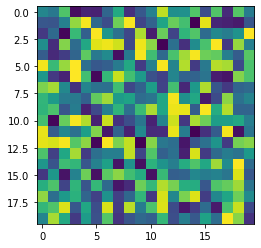

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#matplot으로 그리는 그래프를 브라우저 내부(inline)에 출력하라는 %지시어 
#주피터 노트북에서는 따로 입력하지 않아도 결과물을 바로 확인할 수 있지만, 브라우저에 따라서 필요한 경우가 있다.
print("안녕 Python!")
from IPython.display import display_html
display_html('<table><tr><td style="border:2px solid red">some</td><td style="border:2px solid red">table</td></tr></table>', raw=True)
from IPython.html.widgets import FloatSlider
display(FloatSlider(value=80)) #슬라이더 출력
display(np.random.rand(20,20)) #0부터 19까지 20개의 행*열에 0~1사이의 랜덤수값을 갖는 표를 만든다.
plt.imshow(np.random.rand(20,20), interpolation='none'); #imshow함수:2차원 배열 객체를 색깔로 표시해주는 함수이고, 그래프로 plot 출력한다.
#interpolation: 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양 즉, 고해상도를 보정하는 방법이다.